In [1]:
%matplotlib inline
import geopandas

from weavingspace import WeaveUnit
from weavingspace import Tiling

In [2]:
us = geopandas.read_file("data/states.gpkg")
us = us[us.state != "DC"]
us['Democrat'] = us.dem / us.votes * 100
us['Republican'] = us.gop / us.votes * 100
us['Green'] = us.grn / us.votes * 100
us['Libertarian'] = us.lib / us.votes * 100

In [3]:
w3 = WeaveUnit(spacing = 15000, aspect = 1, weave_type = "twill", n = 3, 
               strands = "ab-|cd-", crs = us.crs)

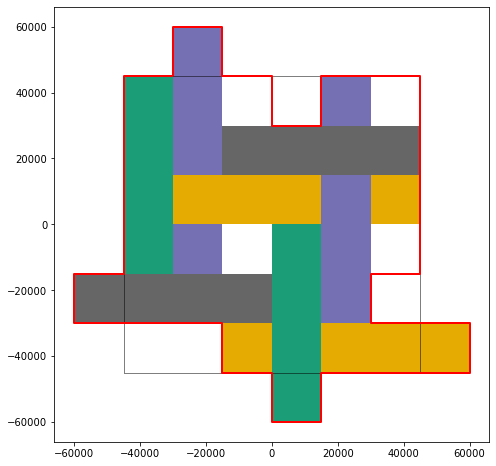

In [4]:
w3.plot(show_ids = False)

In [5]:
tiling = Tiling(w3, us, id_var = "state")

In [6]:
election_map = tiling.get_tiled_map(rotation = 30, prioritise_tiles = False)

In [7]:
election_map.variables = dict(zip(list("abcd"), 
                                  ["Democrat", "Green", "Republican", "Libertarian"]))
election_map.colourmaps = dict(zip(election_map.variables.values(),
                                   ("Blues", "Greens", "Reds", "Purples")))

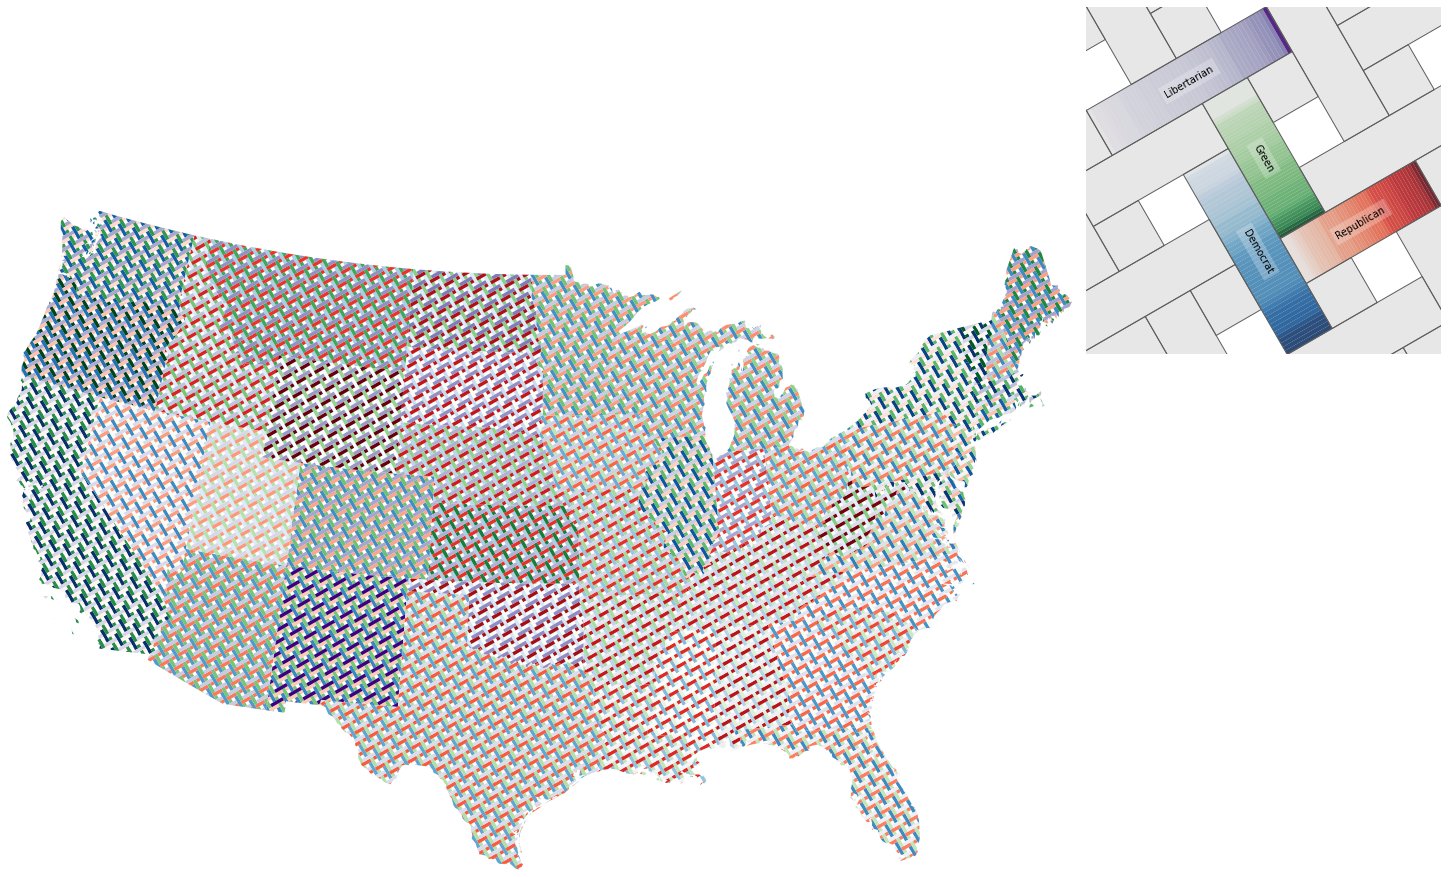

In [8]:
fig = election_map.render()